# Klasifikacija

Za početak ćemo dodati biblioteke za rad sa podacima i učitati sređeni skup podataka.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns=30

In [2]:
banks=pd.read_csv('Bank Marketing/prepared_bank.csv')

In [3]:
banks.head(10)

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single,subscribed?
0,30,0,2,True,False,0,1,0,0,1,0,4,487.000000,2.0,False,False,-1.8,92.893,-46.2,5099.1,1.313,0,1,0,False
1,39,1,3,False,False,0,1,0,0,0,1,4,346.000000,4.0,False,False,1.1,93.994,-36.4,5191.0,4.855,0,0,1,False
2,25,1,3,True,False,0,0,1,0,0,1,2,227.000000,1.0,False,False,1.4,94.465,-41.8,5228.1,4.962,0,1,0,False
3,47,2,5,True,False,1,0,0,0,1,0,0,58.000000,1.0,False,False,-0.1,93.200,-42.0,5195.8,4.191,0,1,0,False
4,32,1,5,False,False,0,0,0,1,1,0,3,128.000000,3.0,False,True,-1.1,94.199,-37.5,4963.6,0.884,0,0,1,False
5,32,2,5,True,False,0,0,0,1,1,0,0,290.000000,4.0,False,False,-1.1,94.199,-37.5,4963.6,0.879,0,0,1,False
6,41,2,5,True,False,1,0,0,0,1,0,0,44.000000,2.0,False,False,-0.1,93.200,-42.0,5195.8,4.191,0,1,0,False
7,31,1,4,False,False,1,0,0,0,1,0,1,68.000000,1.0,False,True,-0.1,93.200,-42.0,5195.8,4.153,1,0,0,False
8,35,0,2,False,False,0,1,0,0,0,1,3,256.974477,1.0,False,False,1.1,93.994,-36.4,5191.0,4.855,0,1,0,False
9,25,1,1,True,False,0,0,1,0,1,0,3,301.000000,1.0,False,False,1.4,93.918,-42.7,5228.1,4.958,0,0,1,False


In [4]:
banks.dtypes

age                 int64
job                 int64
education           int64
housing              bool
loan                 bool
winter              int64
spring              int64
summer              int64
autumn              int64
cellular            int64
telephone           int64
anxiety             int64
duration          float64
campaign          float64
pdays                bool
previous             bool
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
nr_employed       float64
euribor3m         float64
divorced            int64
married             int64
single              int64
subscribed?          bool
dtype: object

In [5]:
banks=banks.dropna()

Nakon dorade podataka vreme je da podelimo skup u dva dela, ulazne podatke (X) i izlazne podatke (y).

In [6]:
X=banks.drop('subscribed?', axis=1)
y=banks['subscribed?']

In [7]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: subscribed?, dtype: bool

In [8]:
X.head()

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single
0,30,0,2,True,False,0,1,0,0,1,0,4,487.0,2.0,False,False,-1.8,92.893,-46.2,5099.1,1.313,0,1,0
1,39,1,3,False,False,0,1,0,0,0,1,4,346.0,4.0,False,False,1.1,93.994,-36.4,5191.0,4.855,0,0,1
2,25,1,3,True,False,0,0,1,0,0,1,2,227.0,1.0,False,False,1.4,94.465,-41.8,5228.1,4.962,0,1,0
3,47,2,5,True,False,1,0,0,0,1,0,0,58.0,1.0,False,False,-0.1,93.200,-42.0,5195.8,4.191,0,1,0
4,32,1,5,False,False,0,0,0,1,1,0,3,128.0,3.0,False,True,-1.1,94.199,-37.5,4963.6,0.884,0,0,1


Pre nego što počnemo sa pojedinačnim algoritmima, dodaćemo metrike performansa, matricu konfuzije i definišemo funckiju za prikaz dobijenih vrednosti. Takođe ćemo da izvršimo proveru tačnosti večinskog izbora, tj. ukoliko svaki atrbiut proglasimo za False, koliko ćemo procentualno biti u pravu. Dobili smo visok procenat 89.1%, što može da implicira da tačnost klasifikacije možda nije najbolja mera za evaulaciju.

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
def print_performance(y, y_hat):
    print(f'Accuracy: {accuracy_score(y, y_hat)}')
    print(f'Precision: {precision_score(y, y_hat)}')
    print(f'Recall: {recall_score(y, y_hat)}')
    print(f'F1: {f1_score(y, y_hat)}')
accuracy_score(y, np.repeat(0, len(y)))

0.8914525432616676

Sada ćemo proći kroz 4 osnovna algoritma, logističku regresiju, naivni Bayes, stablo odlučivanja i kNN klasifikaciju. Za svaki algoritam ćemo kreirati modele prvo nad celim skupom, zatim ćemo skup podeliti na train/test, zatim pomoću kros-valudacije, i na kraju ćemo da korigujemo parametre algoritma kako bismo pokušali da poboljšamo njegovu klasifikaciju.

## Logistička regresija

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [11]:
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [12]:
print_performance(y, model.predict(X))

Accuracy: 0.9137388568432092
Precision: 0.6693227091633466
Recall: 0.4057971014492754
F1: 0.505263157894737


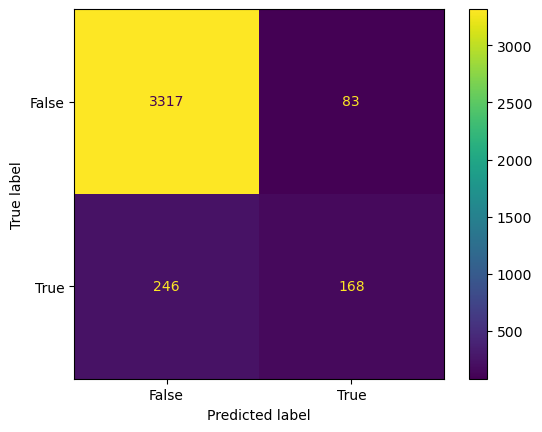

In [13]:
ConfusionMatrixDisplay(confusion_matrix(y, model.predict(X)), display_labels = [False, True]).plot()
plt.show()

Primenom logističke regresije na osnovnom skupu podataka smo doblili visok rezultat za tačnost klasifikacije (viša od većisnke klasifikacije), ali nam je zato odziv imao vrlo nisku vrednost. Prceiznost je donekle i prihvatljiva. Pošto moramo da definišemo koja nam je mera bitnija, u ovom slulaju ćemo najviše gledati odziv, pošto nam je skuplja greška ukoliko klasifikujemo osobu koja nije ostavila depozit kao osobu koja jeste, nego obrnuto.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)

In [15]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
print_performance(y_test, model.predict(X_test))

Accuracy: 0.9109170305676856
Precision: 0.6153846153846154
Recall: 0.4
F1: 0.4848484848484849


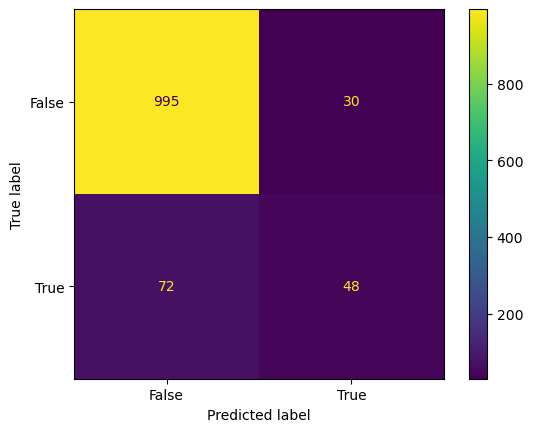

In [17]:
ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)), display_labels = [False, True]).plot()
plt.show()

Nakon podele skupa na test i train (train je 70%, test 30%) dobili smo malo lošije rezultate za svaku od metrika.

In [18]:
from sklearn.model_selection import cross_validate

In [19]:
model=LogisticRegression(max_iter=2000)

In [20]:
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [21]:
def print_cv_performance(result):
    print(f"Accuracy: {round(np.mean(result['test_accuracy'])*100, 2)}% +/- {round(np.std(result['test_accuracy'])*100, 2)}%")
    print(f"Precision: {round(np.mean(result['test_precision'])*100, 2)}% +/- {round(np.std(result['test_precision'])*100, 2)}%")
    print(f"Recall: {round(np.mean(result['test_recall'])*100, 2)}% +/- {round(np.std(result['test_recall'])*100, 2)}%")
    print(f"F1: {round(np.mean(result['test_f1'])*100, 2)}% +/- {round(np.std(result['test_f1'])*100, 2)}%")

In [22]:
print_cv_performance(result)

Accuracy: 91.24% +/- 0.54%
Precision: 66.26% +/- 5.18%
Recall: 40.31% +/- 7.56%
F1: 49.61% +/- 5.48%


Uvođenjem kros-validacije dobili smo da su prosečni rezultati vrlo slični početnom modelu, a takođe možemo da primetimo da postoji visok nivo variranja vrednosti kod odziva.

## Naivni Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [25]:
model.fit(X,y)

GaussianNB()

In [26]:
print_performance(y, model.predict(X))

Accuracy: 0.8518615626638699
Precision: 0.3857791225416036
Recall: 0.6159420289855072
F1: 0.47441860465116287


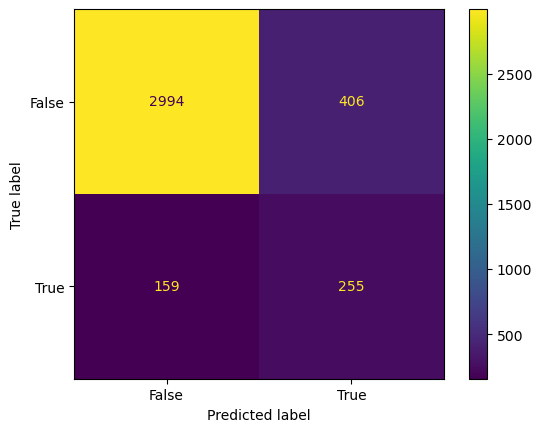

In [27]:
ConfusionMatrixDisplay(confusion_matrix(y, model.predict(X)), display_labels = [False, True]).plot()
plt.show()

Primenom naivnog Bayes-a na originalnom skupu smo postigli ono što smo želeli, a to je viši nivo odziva. Preciznost je mnogo lošija u odnosu na logističku regresiju, ali bismo pre prihvatili ovakav rezultat nego niži nivo odziva.

In [29]:
model.fit(X_train, y_train)

GaussianNB()

In [30]:
print_performance(y_test, model.predict(X_test))

Accuracy: 0.8436681222707424
Precision: 0.35609756097560974
Recall: 0.6083333333333333
F1: 0.44923076923076916


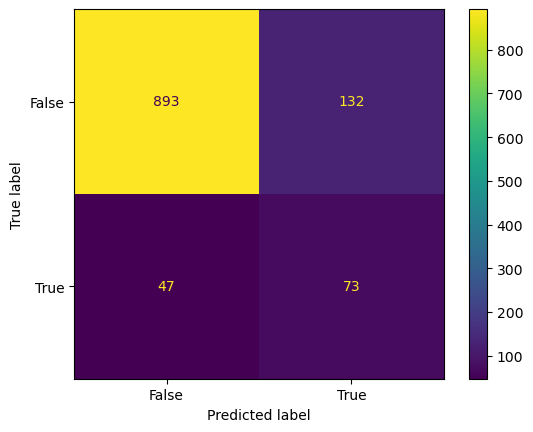

In [31]:
ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)), display_labels = [False, True]).plot()
plt.show()

Podelom na train i test skup rezultati koje smo dobili su vrlo malo slabiji nego kod prvog modela.

In [33]:
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [34]:
print_cv_performance(result)

Accuracy: 85.16% +/- 1.24%
Precision: 38.65% +/- 2.8%
Recall: 61.39% +/- 4.89%
F1: 47.33% +/- 2.72%


Uvođenjem kros-validacije smo dobili, kao i kod logističke regresije, vrlo slične rezultate u odnosu na prethodna dva modela.

## KNN klasifikacija

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [36]:
model.fit(X, y)

KNeighborsClassifier()

In [37]:
print_performance(y, model.predict(X))

D:\Programi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.9268484530676455
Precision: 0.7051671732522796
Recall: 0.5603864734299517
F1: 0.6244952893674294


D:\Programi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


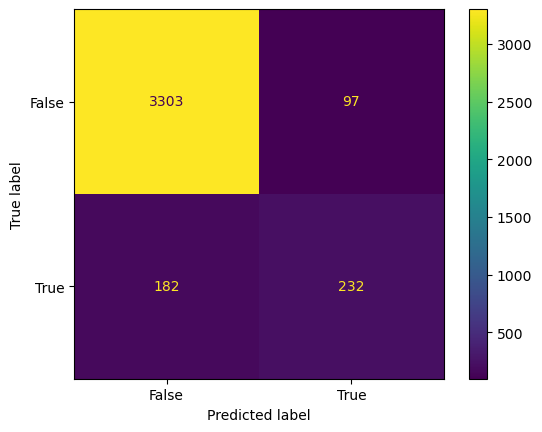

In [38]:
ConfusionMatrixDisplay(confusion_matrix(y, model.predict(X)), display_labels = [False, True]).plot()
plt.show()

Kod modela kNN klasifikacije na originalnom skupu podataka smo dobili vrlo visoke skorove metrika. Preciznost je vrlo visoka, kao i tačnost. Odziv ima nižu vrednost u odnosu na naivni bayes ali nije ni previše loša.

In [40]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
print_performance(y_test, model.predict(X_test))

Accuracy: 0.8943231441048035
Precision: 0.49504950495049505
Recall: 0.4166666666666667
F1: 0.4524886877828054


D:\Programi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


D:\Programi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


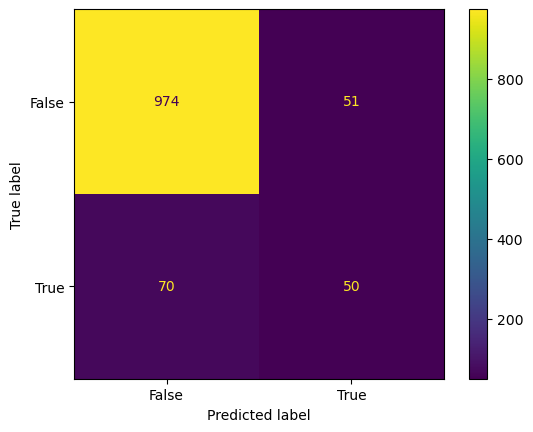

In [42]:
ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)), display_labels = [False, True]).plot()
plt.show()

Podelom na train i test podskup, rezultati su se drastišno promenili na gore. Sve metrike su se smanjile, pogotovo preciznost.

In [44]:
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])

D:\Programi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Programi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

In [45]:
print_cv_performance(result)

Accuracy: 89.75% +/- 1.06%
Precision: 54.19% +/- 7.68%
Recall: 41.8% +/- 7.87%
F1: 46.73% +/- 5.78%


Uvođenjem kros-validacije smo dobili rezultate koji pokazuju da je u proseku preciznost viša nego kod train/test podele, ali odziv nam je praktično isti. Kod ovog modela i preciznost i odziv variraju dosta.

## Stablo odlučivanja

In [46]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [47]:
model.fit(X, y)

DecisionTreeClassifier()

In [48]:
print_performance(y, model.predict(X))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


Stablo odlučivanja nam je dalo perfektne rezultate na osnovnom skupu. Ovo je posledica pretreniranja, jer stablu nismo definisali nikakvo ograničenje.

In [50]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
print_performance(y_test, model.predict(X_test))

Accuracy: 0.8759825327510917
Precision: 0.41911764705882354
Recall: 0.475
F1: 0.4453125


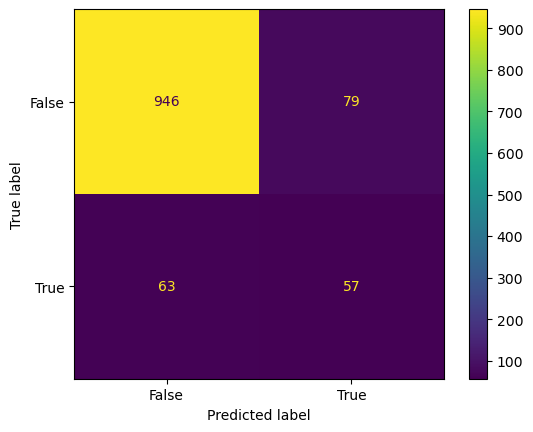

In [52]:
ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)), display_labels = [False, True]).plot()
plt.show()

Nakon podele na test i train podskup stablo je dobilo realnije rezultate, koji nisu preterano dobri.

In [54]:
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [55]:
print_cv_performance(result)

Accuracy: 88.91% +/- 1.58%
Precision: 49.26% +/- 7.08%
Recall: 52.9% +/- 6.39%
F1: 50.93% +/- 6.41%


Uvođenjem kros validacije se u proseku dobijaju bolji rezultati nego podelom na train/test podelu.